<a href="https://colab.research.google.com/github/Meenusj/DSA_ICT/blob/main/DSA_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/credit.csv")
data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
data.shape

(100000, 28)

In [ ]:
data.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
data.dtypes

,0
ID,int64
Customer_ID,int64
Month,int64
Name,object
Age,float64
SSN,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [ ]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

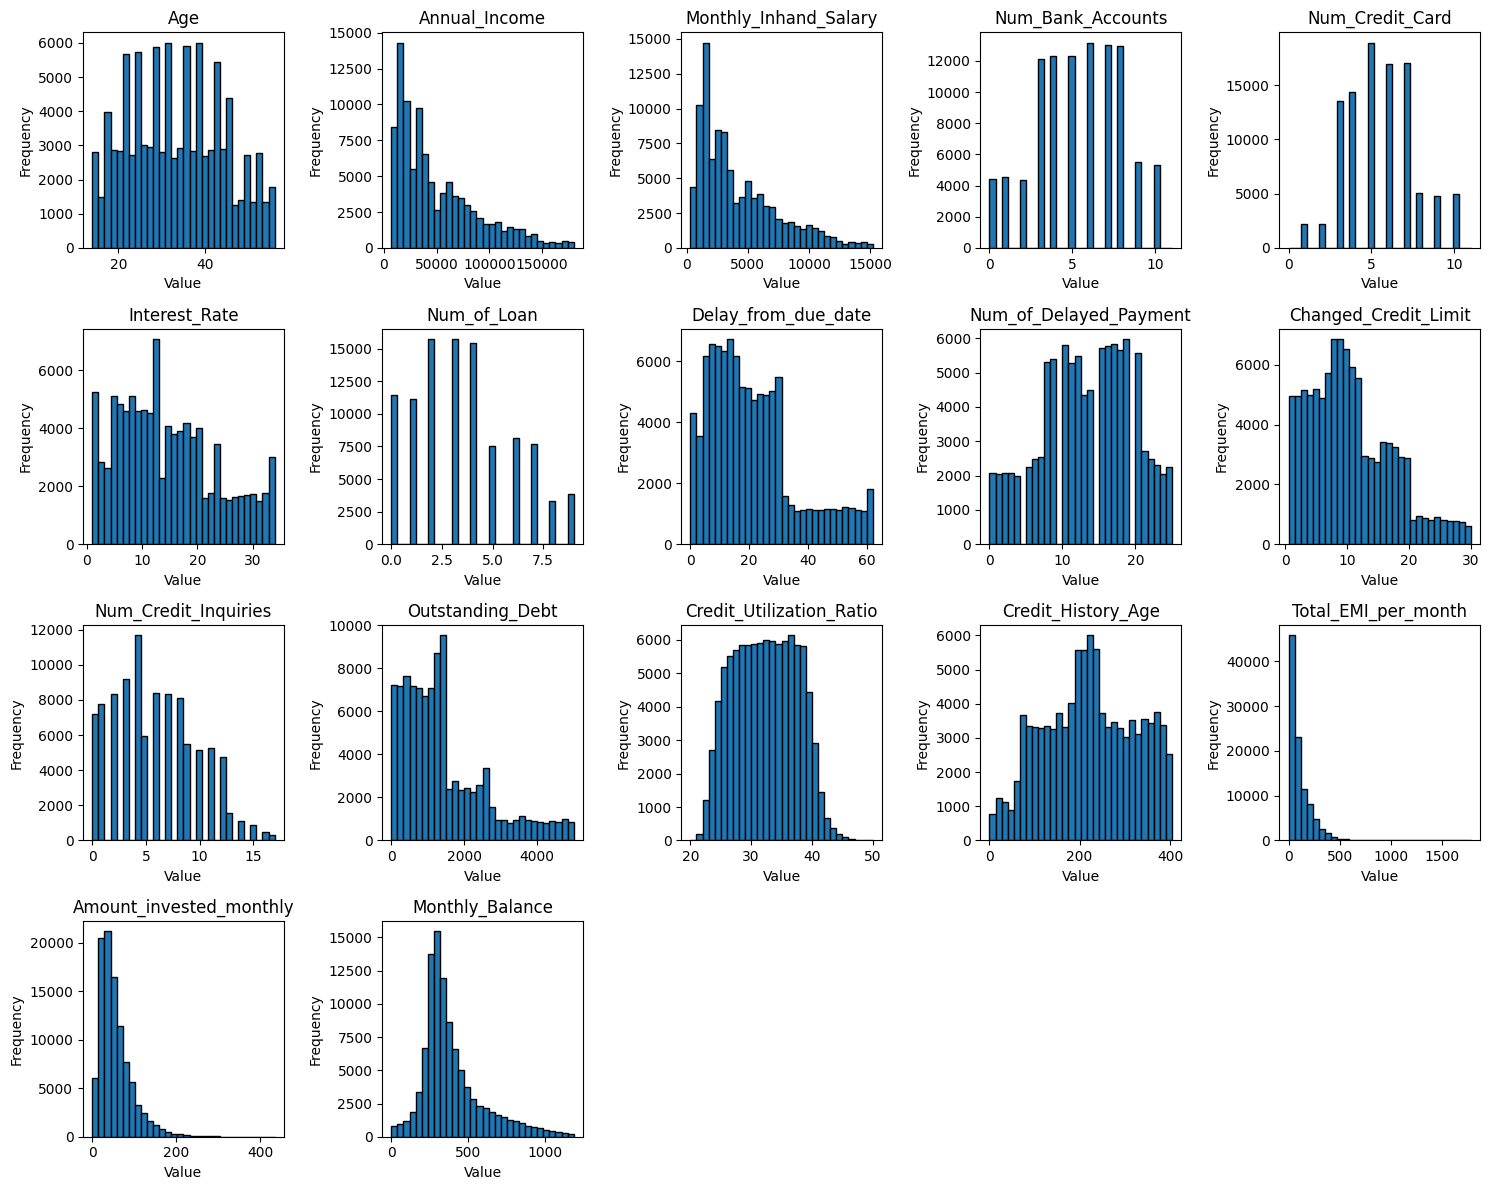

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                      'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                      'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                      'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                      'Outstanding_Debt', 'Credit_Utilization_Ratio',
                      'Credit_History_Age', 'Total_EMI_per_month',
                      'Amount_invested_monthly', 'Monthly_Balance']

plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    plt.hist(data[column], bins=30, edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


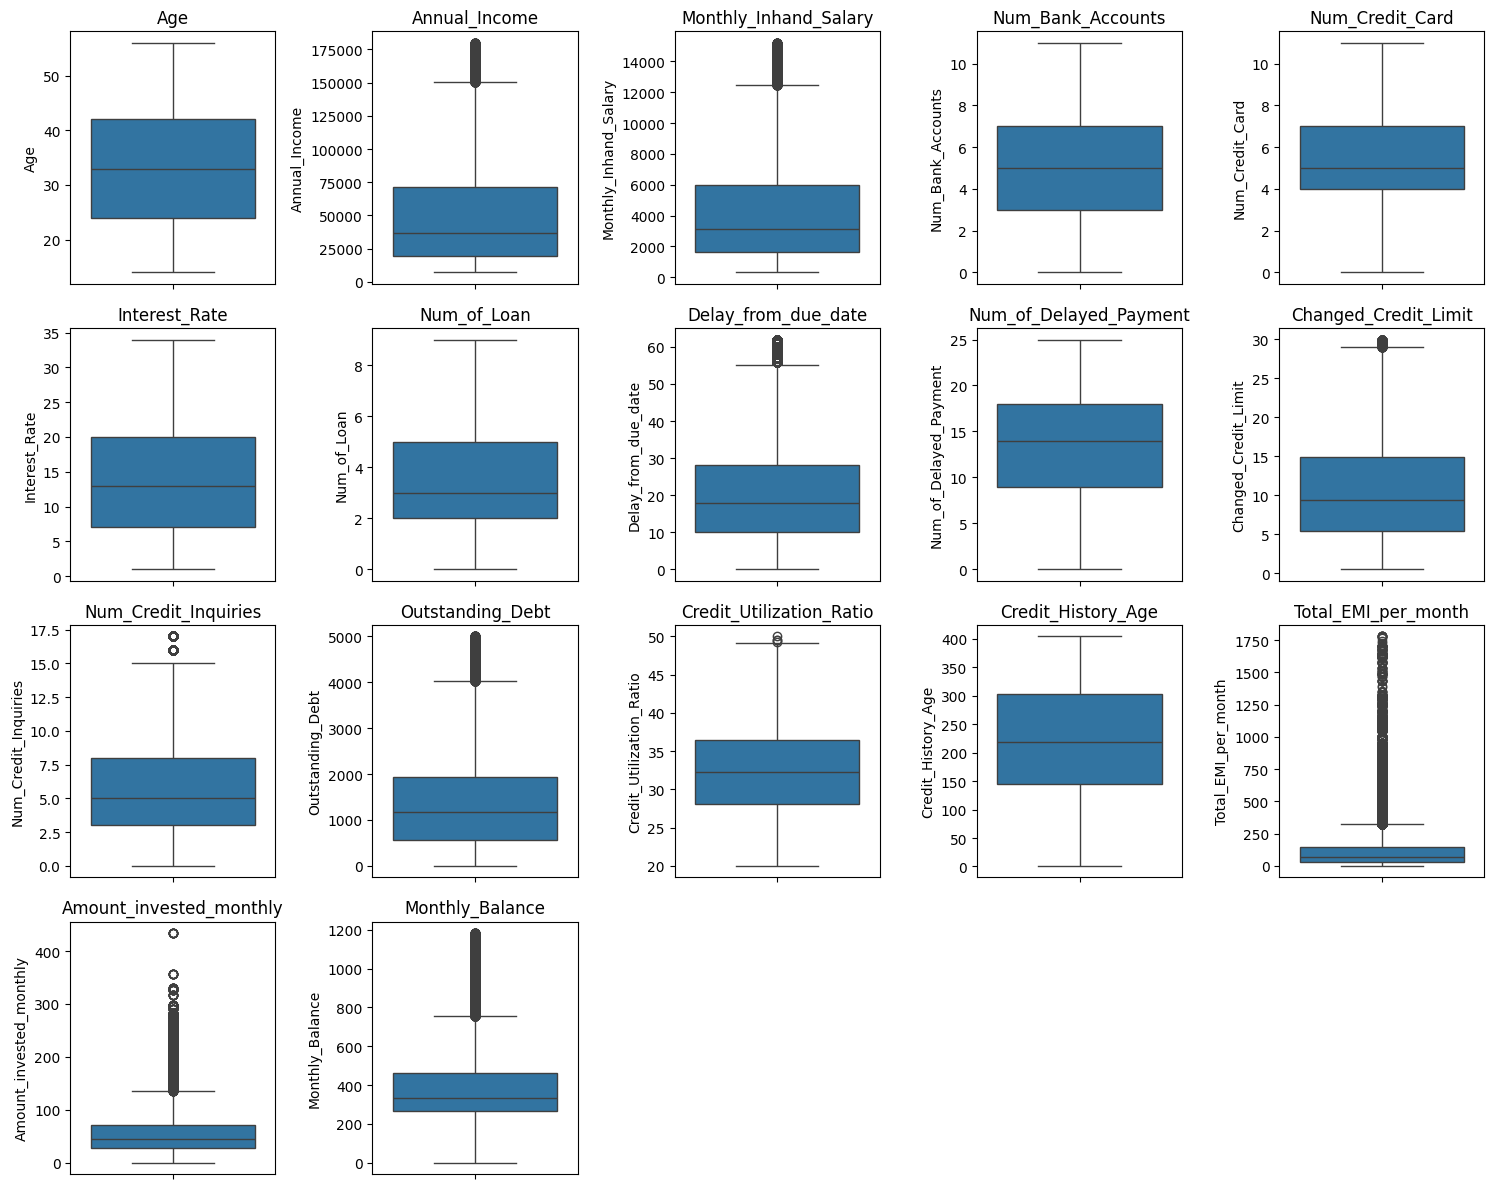

In [ ]:
import seaborn as sns

# Plot box plots for numerical columns
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


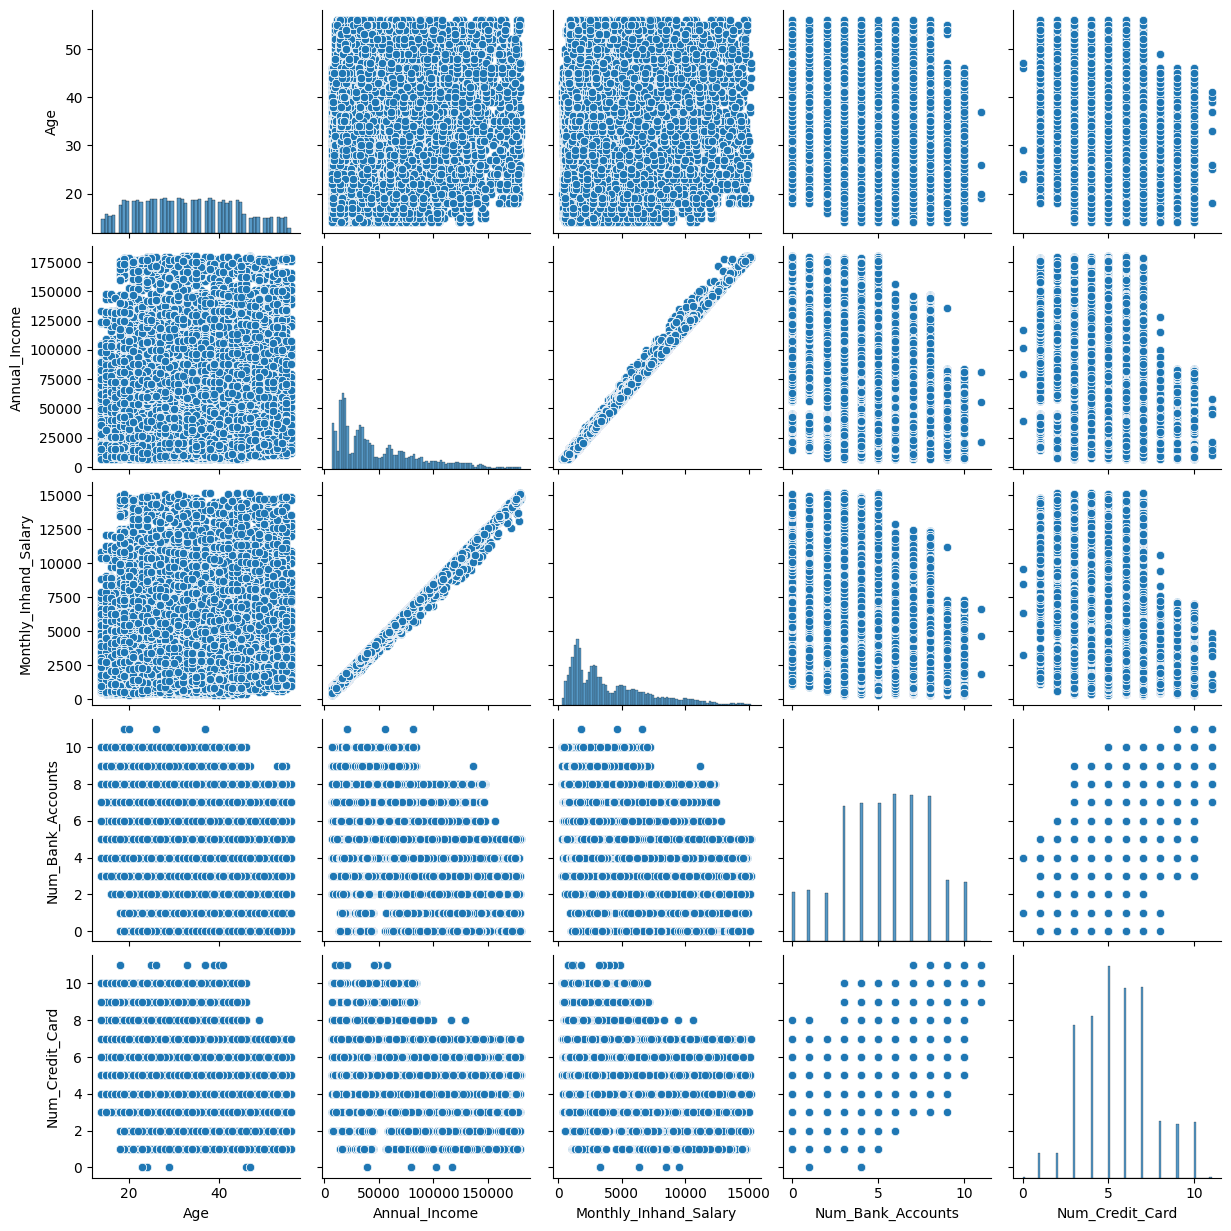

In [ ]:
# Selecting a subset of numerical columns for pair plot
subset = data[numerical_columns[:5]]

# Plot pair plots
sns.pairplot(subset)
plt.show()


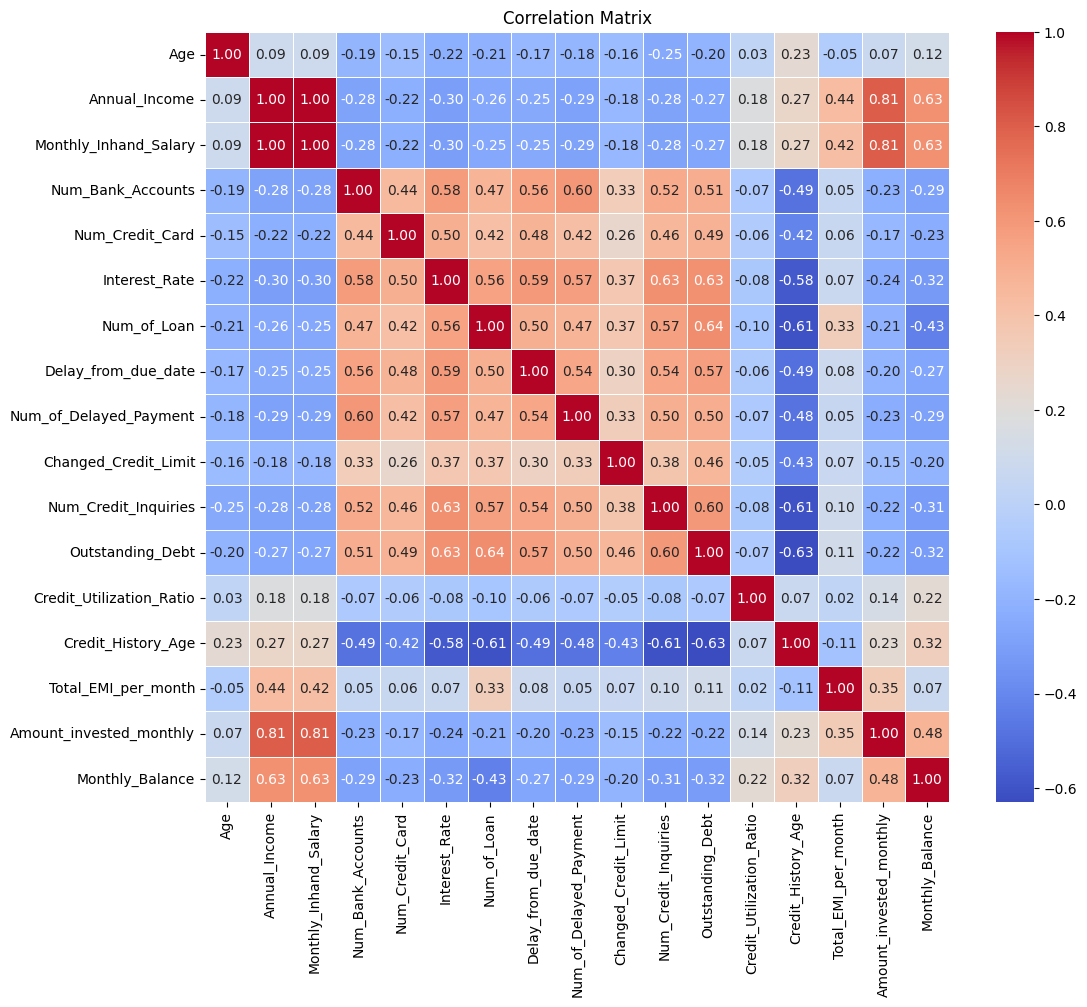

In [ ]:
# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Calculate IQR for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = (data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)

# Print outliers per column
outliers_summary_iqr = outliers_iqr.sum()
print(outliers_summary_iqr)


Age                            0
Annual_Income               2000
Monthly_Inhand_Salary       2017
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date         4002
Num_of_Delayed_Payment         0
Changed_Credit_Limit         579
Num_Credit_Inquiries         787
Outstanding_Debt            5272
Credit_Utilization_Ratio       4
Credit_History_Age             0
Total_EMI_per_month         5044
Amount_invested_monthly     4464
Monthly_Balance             7400
dtype: int64


In [ ]:
# Define columns with significant outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']

# Impute outliers with median values
for column in outlier_columns:
    median = data[column].median()
    # Define thresholds for outliers
    lower_bound = data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    upper_bound = data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    # Replace outliers with median
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])


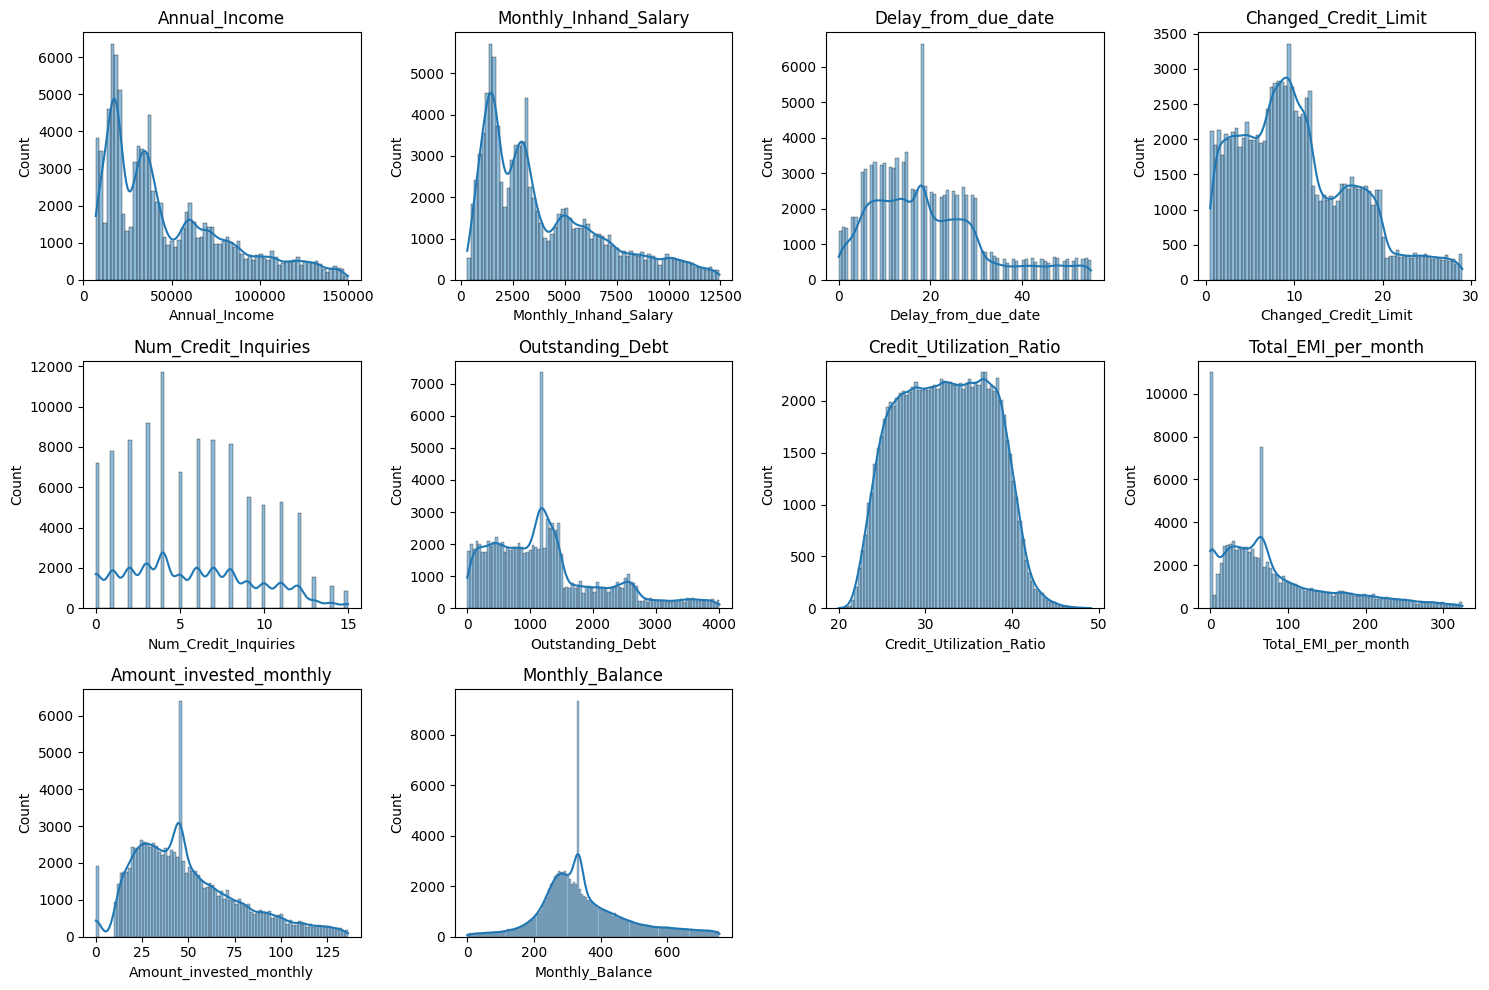

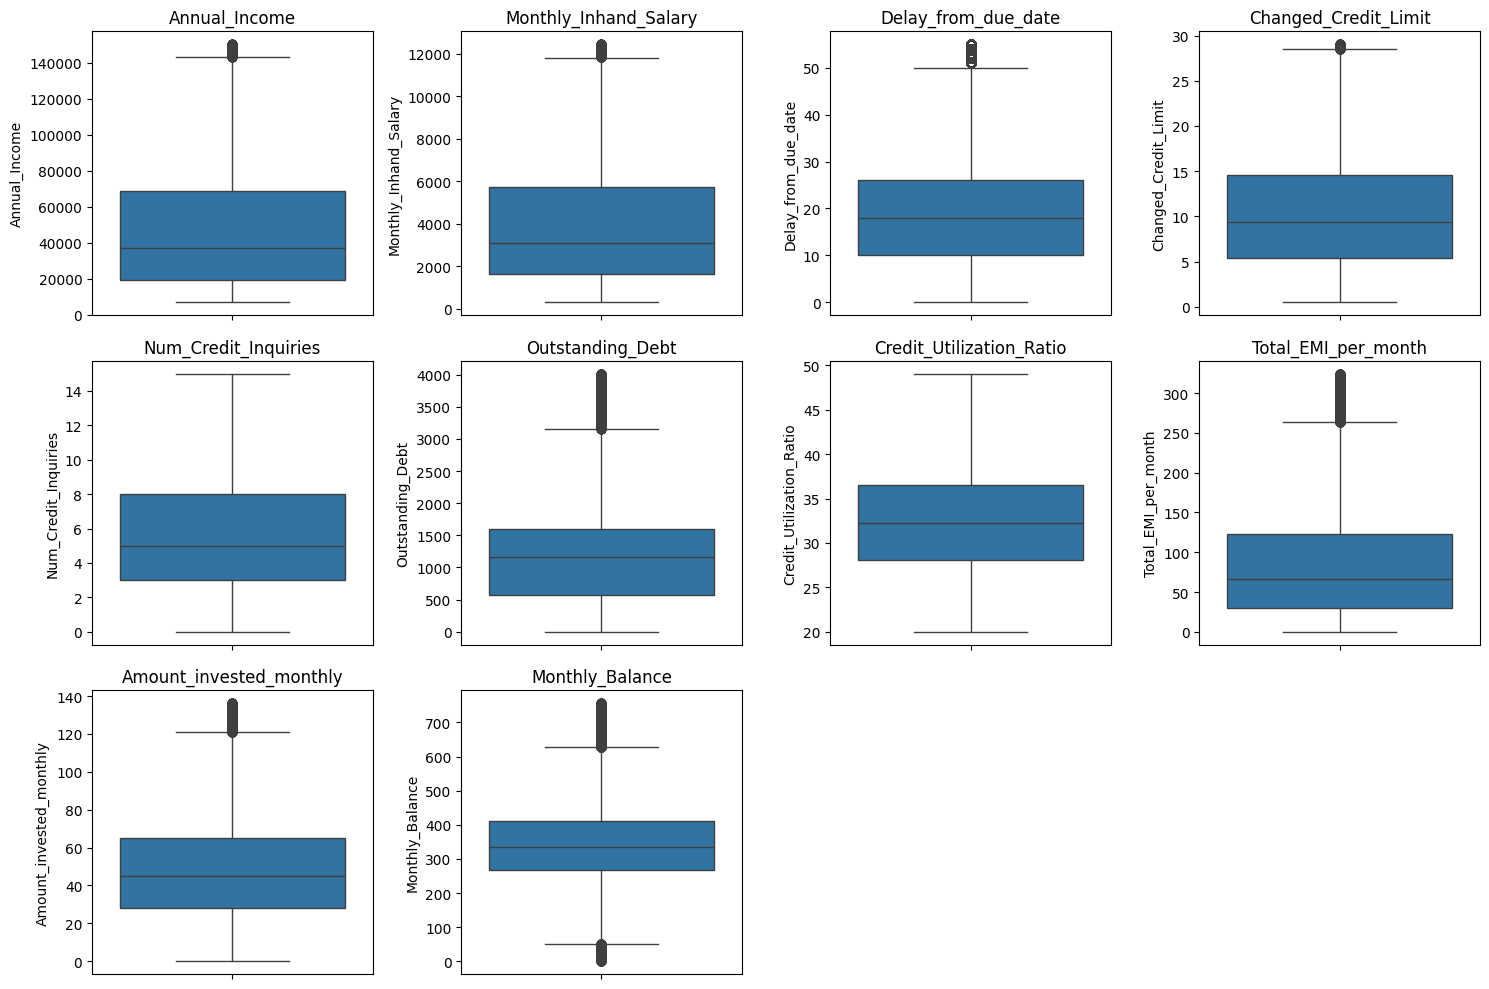

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                     'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                     'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                     'Amount_invested_monthly', 'Monthly_Balance']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Plot box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
# Check for remaining outliers using IQR method
for column in outlier_columns:
    lower_bound = data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    upper_bound = data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Number of remaining outliers in {column}: {outliers.shape[0]}')


Number of remaining outliers in Annual_Income: 840
Number of remaining outliers in Monthly_Inhand_Salary: 961
Number of remaining outliers in Delay_from_due_date: 2929
Number of remaining outliers in Changed_Credit_Limit: 455
Number of remaining outliers in Num_Credit_Inquiries: 0
Number of remaining outliers in Outstanding_Debt: 4824
Number of remaining outliers in Credit_Utilization_Ratio: 0
Number of remaining outliers in Total_EMI_per_month: 3673
Number of remaining outliers in Amount_invested_monthly: 2264
Number of remaining outliers in Monthly_Balance: 6475


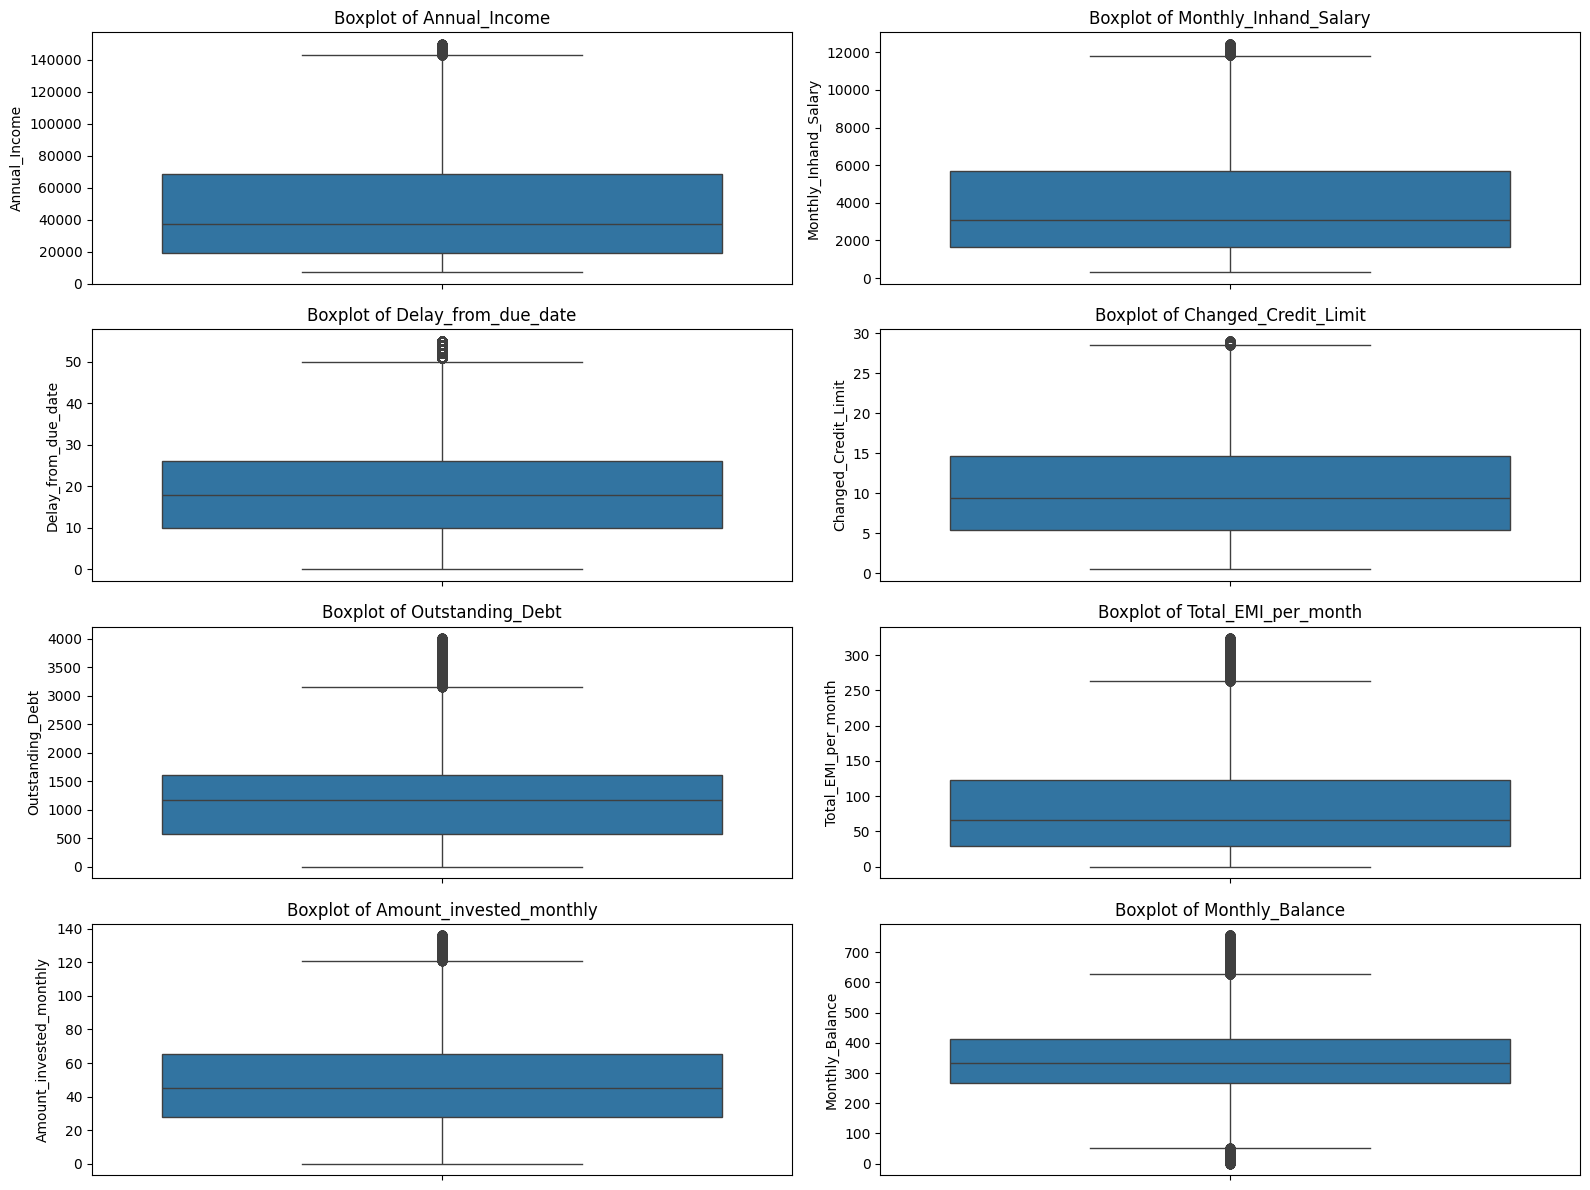

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns with remaining outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                   'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']

# Plotting boxplots for each column with remaining outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [ ]:
# Recheck the number of outliers after handling
for column in outlier_columns:
    # Define thresholds for outliers
    lower_bound = data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    upper_bound = data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))

    # Count remaining outliers
    remaining_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of remaining outliers in {column}: {remaining_outliers.shape[0]}")


Number of remaining outliers in Annual_Income: 840
Number of remaining outliers in Monthly_Inhand_Salary: 961
Number of remaining outliers in Delay_from_due_date: 2929
Number of remaining outliers in Changed_Credit_Limit: 455
Number of remaining outliers in Outstanding_Debt: 4824
Number of remaining outliers in Total_EMI_per_month: 3673
Number of remaining outliers in Amount_invested_monthly: 2264
Number of remaining outliers in Monthly_Balance: 6475


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
# Calculate Z-scores for the relevant columns
z_scores = np.abs(stats.zscore(data[['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                                     'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                                     'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                                     'Amount_invested_monthly', 'Monthly_Balance']]))
# Define the threshold for considering a value as an outlier
threshold = 3
# Identify outliers
outliers = (z_scores > threshold).sum(axis=0)

# Display the number of outliers for each column
print("Number of remaining outliers in each column:")
for i, column in enumerate(['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                             'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                             'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                             'Amount_invested_monthly', 'Monthly_Balance']):
    print(f"{column}: {outliers[i]}")
# Create a boolean mask for rows that do not have outliers
mask = (z_scores <= threshold).all(axis=1)

# Filter the dataframe to remove rows with outliers
data_cleaned = data[mask]

# Display the shape of the original and cleaned data
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Number of remaining outliers in each column:
Annual_Income: 0
Monthly_Inhand_Salary: 0
Delay_from_due_date: 0
Changed_Credit_Limit: 0
Num_Credit_Inquiries: 0
Outstanding_Debt: 400
Credit_Utilization_Ratio: 12
Total_EMI_per_month: 491
Amount_invested_monthly: 160
Monthly_Balance: 0
Original data shape: (100000, 28)
Cleaned data shape: (98954, 28)


<ipython-input-23-72cbef283120>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{column}: {outliers[i]}")


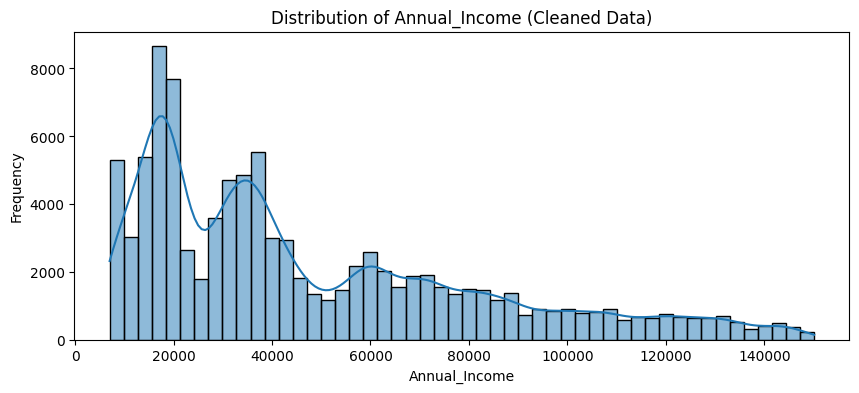

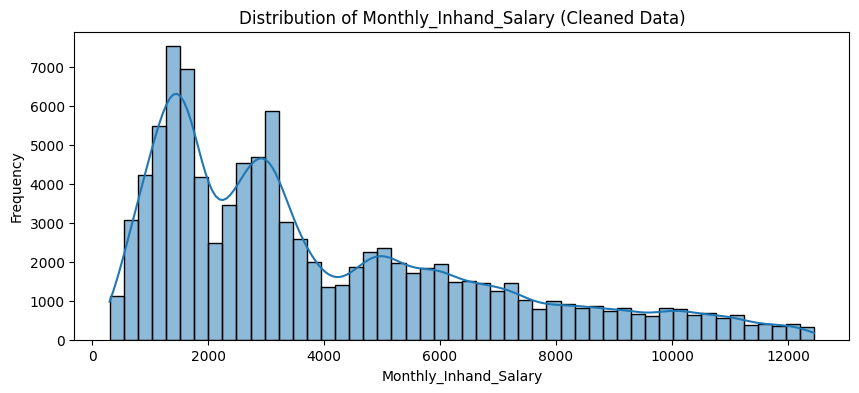

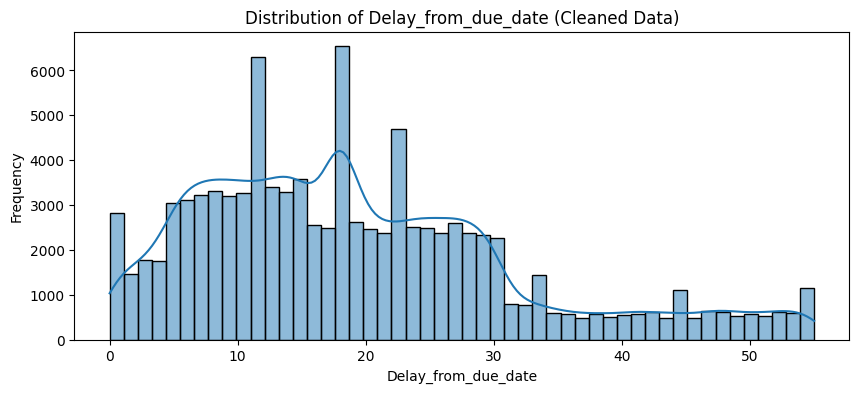

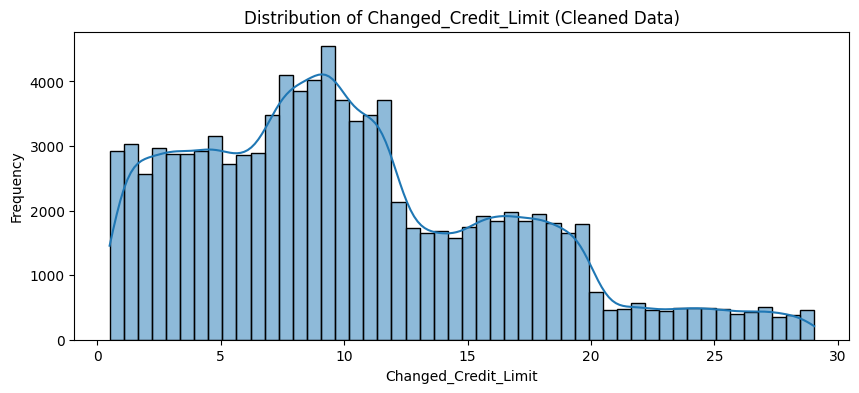

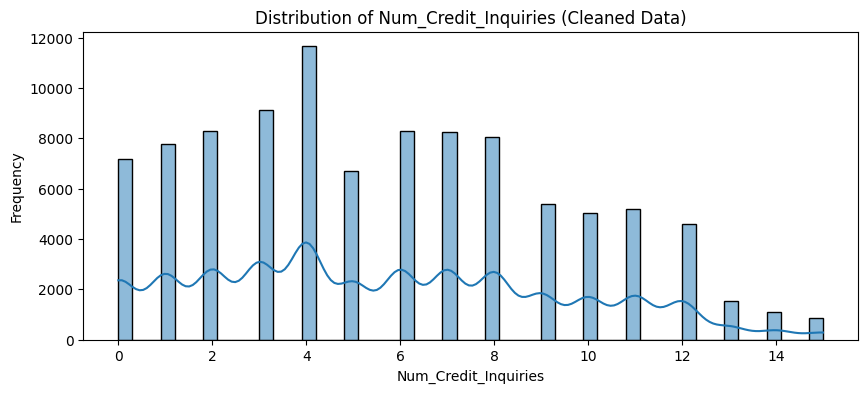

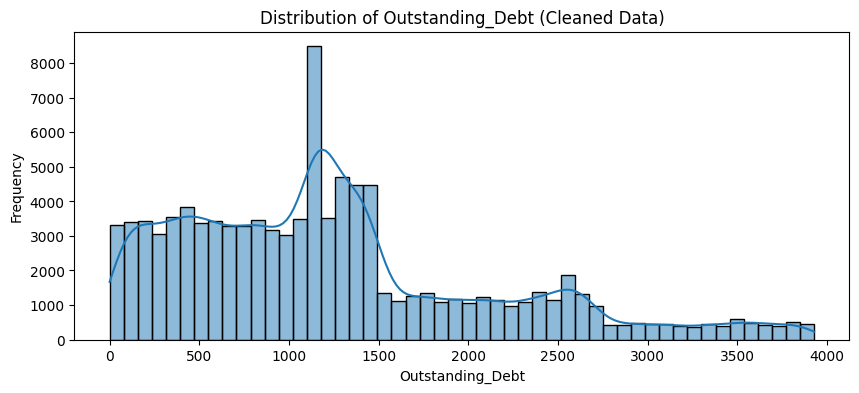

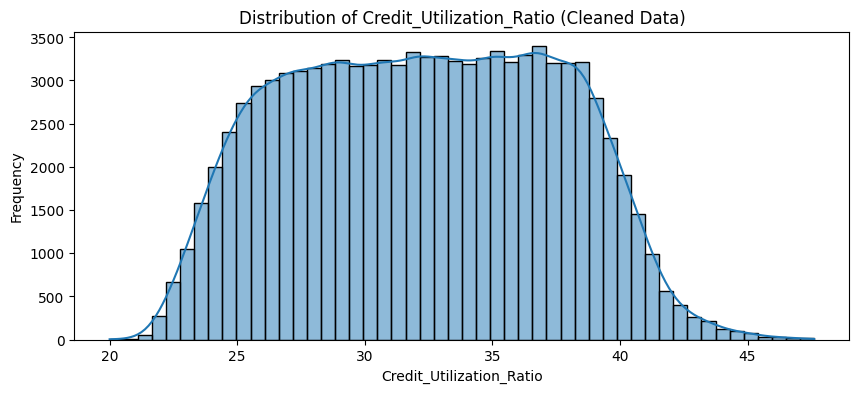

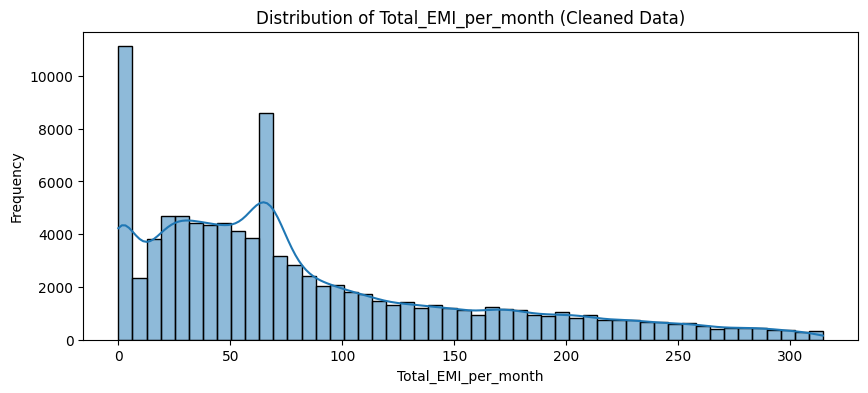

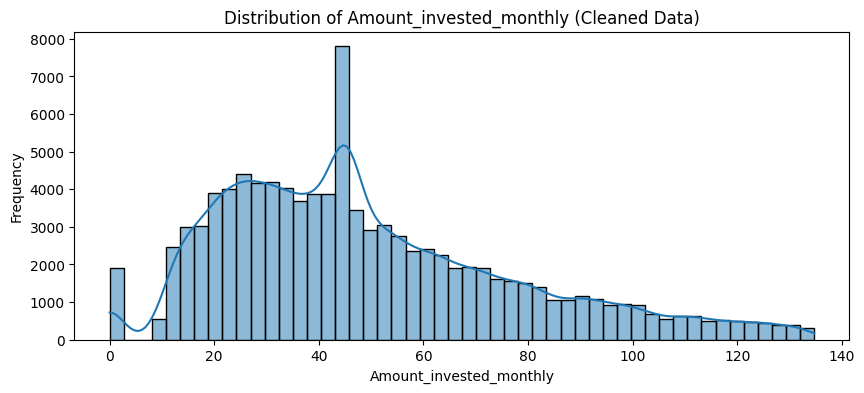

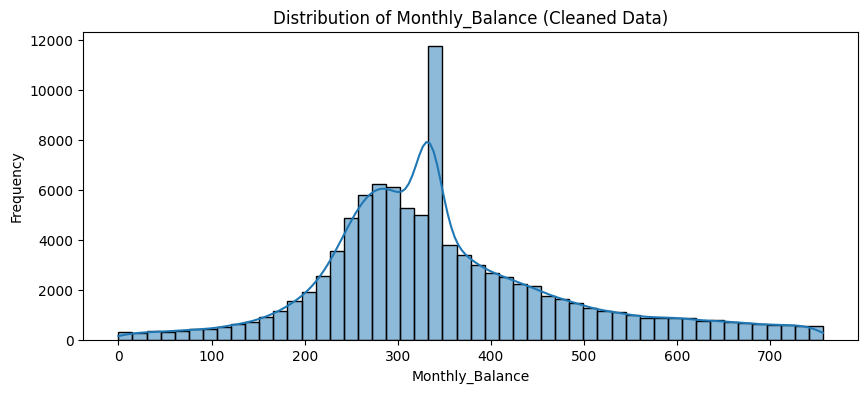

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting cleaned data distributions
columns_to_plot = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']

for column in columns_to_plot:
    plt.figure(figsize=(10, 4))
    sns.histplot(data_cleaned[column], kde=True, bins=50)
    plt.title(f'Distribution of {column} (Cleaned Data)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
features = data.drop('Credit_Score', axis=1)  # Drop target column for features
target = data['Credit_Score']  # Target column

# Split the data into training + validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Testing Set: {X_test.shape}")


Training Set: (64000, 27), Validation Set: (16000, 27), Testing Set: (20000, 27)
